### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [ ]:
import numpy as np


In [ ]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1823,white,7.3,0.190,0.24,6.3,0.054,34.0,231.0,0.99640,3.36,0.54,10.0,6
3517,white,6.6,0.290,0.29,1.8,0.036,38.0,102.0,0.98819,3.08,0.42,13.7,7
6092,red,7.0,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5,6
5823,red,8.6,0.220,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7
118,white,7.2,0.310,0.50,13.3,0.056,68.0,195.0,0.99820,3.01,0.47,9.2,5


In [ ]:
# Your Code goes Here

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
df=wine.dropna()
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df['type'].unique(),df['quality'].unique()

(array(['white', 'red'], dtype=object), array([6, 5, 7, 8, 4, 3, 9]))

In [ ]:
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


#KNN On Dataset Without PCA

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y.head(2)

,quality
0,6
1,6


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
X_train.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1335,white,5.7,0.21,0.24,2.3,0.047,60.0,189.0,0.99500,3.65,0.72,10.1
687,white,6.8,0.67,0.30,13.0,0.290,22.0,193.0,0.99840,3.08,0.67,9.0
6432,red,6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.7


In [ ]:
import plotly.express as ex
ex.scatter_3d(X_train,x='fixed acidity',y='pH',z='alcohol',color=y_train.astype('str'))

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
cat_pipe=Pipeline([
    ('ohe',OneHotEncoder(sparse_output=False,dtype=np.int32,handle_unknown='ignore'))
])

CT1=ColumnTransformer([
    ('cat_pipe',cat_pipe,['type'])
],remainder='passthrough')

pipe1=make_pipeline(CT1,StandardScaler(),KNeighborsClassifier())
pipe1.fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
y_pred1=pipe1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.5668986852281516

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe1,X_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.551063829787234)

#KNN wiht PCA

In [ ]:
from sklearn.decomposition import PCA
cat_pipe=Pipeline([
    ('ohe',OneHotEncoder(sparse_output=False,dtype=np.int32,handle_unknown='ignore'))
])

CT1=ColumnTransformer([
    ('cat_pipe',cat_pipe,['type'])
],remainder='passthrough')

pipe2=make_pipeline(CT1,StandardScaler(),PCA(n_components=9),KNeighborsClassifier())
pipe2.fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type'])])),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=9)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
y_pred2=pipe2.predict(X_test)
accuracy_score(y_test,y_pred2)

0.5707656612529002

In [ ]:
pca=pipe2[2]
pca.components_
#Return Top Eigen Vectors(10 for this )

array([[ 0.4395198 , -0.4395198 ,  0.23971741,  0.32453196, -0.0996497 ,
        -0.2036053 ,  0.26490294, -0.29228448, -0.36278861,  0.15137623,
         0.15806978,  0.25367552,  0.00162089],
       [ 0.04899132, -0.04899132,  0.25047352,  0.01034206,  0.21352717,
         0.41288943,  0.21848224,  0.19424748,  0.21994233,  0.55094106,
        -0.20203139,  0.10595861, -0.47630145],
       [-0.04106064,  0.04106064,  0.45361504, -0.2799352 ,  0.58703746,
        -0.18278796,  0.0326532 , -0.1597158 , -0.12831291, -0.15797109,
        -0.43671411,  0.11882519,  0.24827451],
       [ 0.0080495 , -0.0080495 , -0.20072558, -0.2215061 ,  0.25856502,
        -0.17171487,  0.27002324,  0.35421302,  0.2075525 , -0.08128428,
         0.42578695,  0.61453825,  0.08459587],
       [-0.07976105,  0.07976105, -0.16609737,  0.18252533, -0.19241669,
        -0.31996517,  0.64763694,  0.11017918,  0.11002541, -0.28110632,
        -0.46218804, -0.06744486, -0.21471985],
       [ 0.13188796, -0.131887

In [ ]:
pca.explained_variance_
#Return Top(10) eigenValues

array([4.67721981, 2.53078584, 1.54277377, 0.99024238, 0.7454917 ,
       0.62471764, 0.55726978, 0.49772782, 0.37293702])

In [ ]:
pca.explained_variance_ratio_
#Return প্রতি কম্পোনেন্ট কত % ভ্যারিয়েন্স রাখে

array([0.35971655, 0.19463818, 0.11865195, 0.07615776, 0.05733442,
       0.04804591, 0.04285861, 0.03827935, 0.02868191])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35971655, 0.55435473, 0.67300668, 0.74916444, 0.80649886,
       0.85454477, 0.89740338, 0.93568273, 0.96436465])

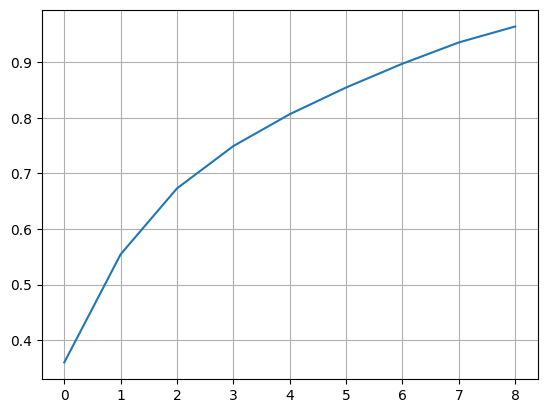

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid('True')

#Extract Principle Components Step by Setp

In [ ]:
pipe2.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('cat_pipe',
                                  Pipeline(steps=[('ohe',
                                                   OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                 handle_unknown='ignore',
                                                                 sparse_output=False))]),
                                  ['type'])]),
 'standardscaler': StandardScaler(),
 'pca': PCA(n_components=9),
 'kneighborsclassifier': KNeighborsClassifier()}

In [ ]:
X_ct_tf=pipe2.named_steps['columntransformer'].transform(X_train)
X_ct_tf
#return Transformed Value After ColumnTransformation

array([[ 0.  ,  1.  ,  5.7 , ...,  3.65,  0.72, 10.1 ],
       [ 0.  ,  1.  ,  6.8 , ...,  3.08,  0.67,  9.  ],
       [ 1.  ,  0.  ,  6.6 , ...,  3.42,  0.62, 11.7 ],
       ...,
       [ 1.  ,  0.  ,  7.1 , ...,  3.37,  0.64, 10.4 ],
       [ 1.  ,  0.  ,  7.  , ...,  3.35,  0.81, 10.6 ],
       [ 0.  ,  1.  ,  6.4 , ...,  3.36,  0.71, 12.5 ]])

In [ ]:
# X_scal_tf=pipe2.named_steps['standardscaler'].transform(X_train) #can't transform cause X_train has Object Feature.(It do not come throuthout the Pipeline)
X_scal_tf=pipe2.named_steps['standardscaler'].transform(X_ct_tf)
X_scal_tf
#return Transformed Value After ColumnTransformation and Scaling(Standardscaler)

array([[-0.56945833,  0.56945833, -1.17771746, ...,  2.72328632,
         1.26520297, -0.33159867],
       [-0.56945833,  0.56945833, -0.31966768, ..., -0.86292183,
         0.9308388 , -1.2591166 ],
       [ 1.75605475, -1.75605475, -0.47567673, ...,  1.27621988,
         0.59647463,  1.01751832],
       ...,
       [ 1.75605475, -1.75605475, -0.0856541 , ...,  0.96164021,
         0.7302203 , -0.07863923],
       [ 1.75605475, -1.75605475, -0.16365863, ...,  0.83580835,
         1.86705847,  0.09000039],
       [-0.56945833,  0.56945833, -0.63168578, ...,  0.89872428,
         1.19833013,  1.69207682]])

In [ ]:
pc_arr=pipe2.named_steps['pca'].transform(X_scal_tf)
pc_arr
#return Principle Components  Value After ColumnTransformation,Scaling(Standardscaler) and PCA

array([[-1.10909323, -0.39168954, -2.04089563, ..., -0.64479607,
        -0.78692477,  0.27399249],
       [ 1.41733436,  3.70585203, -0.92957337, ...,  1.86433063,
         3.07620001,  0.79888528],
       [ 3.33932332, -1.75159753, -1.16604761, ...,  0.29496307,
         0.34368436, -0.39552174],
       ...,
       [ 2.96839472, -0.37446528, -0.94476846, ..., -0.32082645,
        -0.2563766 , -0.68802611],
       [ 3.65276052, -0.94496631, -1.20588557, ...,  1.094111  ,
        -1.05356732, -0.80871388],
       [-0.33749006, -2.00822909,  0.03226068, ...,  1.30439898,
         0.13622127,  0.65121656]])

In [ ]:
pc_arr.shape

(5170, 9)

In [ ]:
import pandas as pd
pc_df=pd.DataFrame(pc_arr,columns=[f'pc{i}' for i in range(1,pc_arr.shape[1]+1)])
pc_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.109093,-0.391690,-2.040896,3.070201,-0.682777,-0.294053,-0.644796,-0.786925,0.273992
1,1.417334,3.705852,-0.929573,1.176738,4.599229,-0.493413,1.864331,3.076200,0.798885
2,3.339323,-1.751598,-1.166048,0.027140,-0.436086,0.420919,0.294963,0.343684,-0.395522
3,-1.543580,-1.186004,1.509760,-1.191898,0.851457,0.807433,-0.706016,-1.152065,-0.956210
4,-1.467607,0.554879,-0.050763,-0.628583,-0.265288,0.677590,0.326453,-0.192881,-0.310100
...,...,...,...,...,...,...,...,...,...
5165,-0.677255,-1.451142,0.876912,1.118235,-0.335408,-0.200552,0.827484,-0.771040,-0.199638
5166,3.184019,0.951241,-1.333397,-1.158235,1.058241,0.840810,-0.217774,0.432851,0.554165
5167,2.968395,-0.374465,-0.944768,0.509827,-0.060742,0.148953,-0.320826,-0.256377,-0.688026
5168,3.652761,-0.944966,-1.205886,0.590422,0.087716,0.002629,1.094111,-1.053567,-0.808714


In [ ]:
ex.scatter_3d(pc_df,x='pc1',y='pc2',z='pc3',color=y_train.astype('str'))

In [ ]:
pca2=pipe2.named_steps['pca']
pca2.components_

array([[ 0.4395198 , -0.4395198 ,  0.23971741,  0.32453196, -0.0996497 ,
        -0.2036053 ,  0.26490294, -0.29228448, -0.36278861,  0.15137623,
         0.15806978,  0.25367552,  0.00162089],
       [ 0.04899132, -0.04899132,  0.25047352,  0.01034206,  0.21352717,
         0.41288943,  0.21848224,  0.19424748,  0.21994233,  0.55094106,
        -0.20203139,  0.10595861, -0.47630145],
       [-0.04106064,  0.04106064,  0.45361504, -0.2799352 ,  0.58703746,
        -0.18278796,  0.0326532 , -0.1597158 , -0.12831291, -0.15797109,
        -0.43671411,  0.11882519,  0.24827451],
       [ 0.0080495 , -0.0080495 , -0.20072558, -0.2215061 ,  0.25856502,
        -0.17171487,  0.27002324,  0.35421302,  0.2075525 , -0.08128428,
         0.42578695,  0.61453825,  0.08459587],
       [-0.07976105,  0.07976105, -0.16609737,  0.18252533, -0.19241669,
        -0.31996517,  0.64763694,  0.11017918,  0.11002541, -0.28110632,
        -0.46218804, -0.06744486, -0.21471985],
       [ 0.13188796, -0.131887